### Exercise 1.1

##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [7]:
import pandas as pd 

df = pd.read_csv ('../data/2019_Yellow_Taxi_Trip_Data.csv')

df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


### Exercise 1.2

##### Find the dimensions (number of rows and number of columns) in the data.

In [12]:
df.info()
df.shape()

(10000, 18)

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [22]:
df [['fare_amount','tip_amount','tolls_amount','total_amount']].describe ()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [31]:
row_max = df.trip_distance.idxmax()

df [['fare_amount','tip_amount','tolls_amount','total_amount']].loc [row_max]

df.loc [12, ['fare_amount','tip_amount','tolls_amount','total_amount']]

fare_amount     176.00
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: float64

---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [13]:
import pandas as pd 
meteorite = pd.read_csv ('../data/Meteorite_Landings.csv')

meteorite = meteorite.rename (
    columns={'mass (g)':'massa'})

meteorite = meteorite.drop(['id','reclat','reclong'],axis=1)
meteorite.sort_values('massa',ascending=False)

,name,nametype,recclass,massa,fall,year,GeoLocation
16392,Hoba,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM,"(-19.58333, 17.91667)"
5373,Cape York,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM,"(76.13333, -64.93333)"
5365,Campo del Cielo,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM,"(-27.46667, -60.58333)"
5370,Canyon Diablo,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM,"(35.05, -111.03333)"
3455,Armanty,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM,"(47.0, 88.0)"
...,...,...,...,...,...,...,...
38282,Wei-hui-fu (a),Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM,NaN
38283,Wei-hui-fu (b),Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM,NaN
38285,Weiyuan,Valid,Mesosiderite,NaN,Found,01/01/1978 12:00:00 AM,"(35.26667, 104.31667)"
41472,Yamato 792768,Valid,CM2,NaN,Found,01/01/1979 12:00:00 AM,"(-71.5, 35.66667)"


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [37]:
import pandas as pd 
meteorite = pd.read_csv ('../data/Meteorite_Landings.csv')

meteorite ['year']=meteorite ['year'].str.slice(6,11)
meteorite ['year']= meteorite.year.apply(pd.to_numeric)

meteorite['pre_1970'] = meteorite.apply(lambda x: 'Y' if (x.fall == 'Fell') and (x.year < 1970) else 'N', axis=1)

meteorite = meteorite.set_index('id')
meteorite = meteorite.sort_index()
meteorite
#meteorite.loc [10036:10040]


,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,pre_1970
id,,,,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",Y
2,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",Y
4,Abajo,Valid,H5,331.0,Found,1982.0,26.80000,-105.41667,"(26.8, -105.41667)",N
5,Abbott,Valid,H3-6,21100.0,Found,1951.0,36.30000,-104.28333,"(36.3, -104.28333)",N
6,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",Y
...,...,...,...,...,...,...,...,...,...,...
57454,Mandalay Spring,Valid,L6,2854.0,Found,2012.0,40.89201,-118.55319,"(40.89201, -118.55319)",N
57455,Antelope,Valid,H4,754.0,Found,2012.0,40.90183,-118.54465,"(40.90183, -118.54465)",N
57456,Northwest Africa 7870,Valid,L4,42.0,Found,2004.0,0.00000,0.00000,"(0.0, 0.0)",N


#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [15]:
import pandas as pd
meteorite = pd.read_csv ('../data/Meteorite_Landings.csv')

meteorite = meteorite\
    .rename(columns = {'mass (g)':'mass'})
meteorite.year = meteorite.year\
    .str.slice(6,11)\
    . apply(pd.to_numeric)
meteorite_filter = meteorite\
    .query ('year >=2005 and year<=2009')\
    .sort_values('year')

meteorite_filter.pivot_table (
    index = 'year', columns = 'fall',
    values= 'mass', aggfunc = ['count', lambda x:x.quantile (0.95)],
    margins = True
)

#meteorite.year = meteorite.year.apply(pd.to_numeric)
#meteorite = meteorite.set_index(yea)


#meteorite_filter.head ()

count                <lambda>                  
fall    Fell   Found   All      Fell    Found      All
year                                                  
2005.0   NaN   874.0   874       NaN  4500.00  4500.00
2006.0   5.0  2450.0  2455   25008.0  1600.50  1722.78
2007.0   8.0  1181.0  1189   89675.0  1126.90  1223.12
2008.0   9.0   948.0   957  106000.0  2274.80  2745.60
2009.0   5.0  1492.0  1497    8333.4  1397.25  1446.94
All     27.0  6945.0  6972  100000.0  1841.64  1963.35

#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [23]:
import pandas as pd
import numpy as np

meteorite = pd.read_csv ('../data/Meteorite_Landings.csv')

meteorite[['mass (g)','fall']].groupby('fall').describe()


mass (g)                                                             \
         count          mean            std  min     25%     50%      75%   
fall                                                                        
Fell    1075.0  47070.715023  717067.125826  0.1  686.00  2800.0  10450.0   
Found  44510.0  12461.922983  571105.752311  0.0    6.94    30.5    178.0   

                   
              max  
fall               
Fell   23000000.0  
Found  60000000.0

#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [55]:
import pandas as pd

taxi = pd.read_csv(
    '../data/2019_Yellow_Taxi_Trip_Data.csv',
    parse_dates=True, index_col='tpep_dropoff_datetime'
)
taxi[['trip_distance','fare_amount','tolls_amount','tip_amount']].resample("1H").agg('sum').nlargest(5,'fare_amount')

'''
taxi[['trip_distance', 'fare_amount', 'tolls_amount', 'tip_amount']] \
    .resample("1H") \
    .agg('sum') \
    .nlargest(5, 'fare_amount')
'''

'\ntaxi[[\'trip_distance\', \'fare_amount\', \'tolls_amount\', \'tip_amount\']]     .resample("1H")     .agg(\'sum\')     .nlargest(5, \'fare_amount\')\n'

--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

<Axes: ylabel='travelers'>

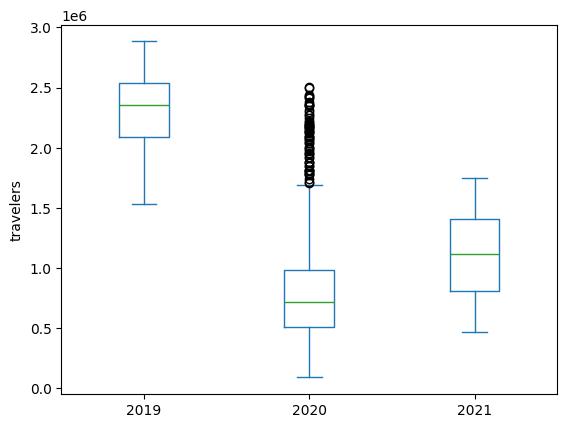

In [23]:
import pandas as pd

data = pd.read_csv ('../data/tsa_melted_holiday_travel.csv')
data = data.pivot (columns='year',values='travelers')
data.plot (kind='box',ylabel ='travelers')


#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

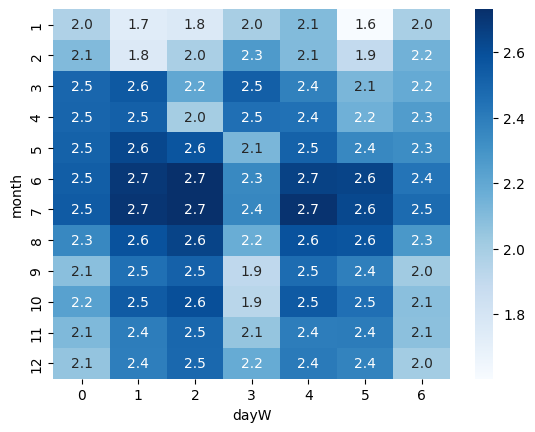

In [48]:
import pandas as pd
import seaborn as sns

data = pd.read_csv ('../data/tsa_melted_holiday_travel.csv', parse_dates=True, index_col='date')
data = data[data.year==2019]\
    .assign (month = lambda x: x.index.month)\
    .assign (dayW = lambda x: x.index.dayofweek)\
    .pivot_table(index='month',columns='dayW',values='travelers',aggfunc='median')
plot = sns.heatmap (data=data/1e6,annot = True,cmap='Blues',fmt='.1f')

#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.

<Axes: ylabel='travelers'>

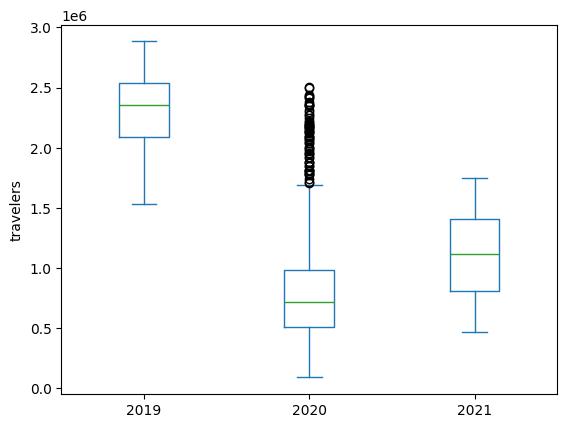

In [49]:
import pandas as pd

data = pd.read_csv ('../data/tsa_melted_holiday_travel.csv')
#data = data [['year','travelers']]
data = data.pivot (columns='year',values='travelers')
#data=data.T
#data
#data.melt(id_vars='year').head()
data.plot (kind='box',ylabel ='travelers')


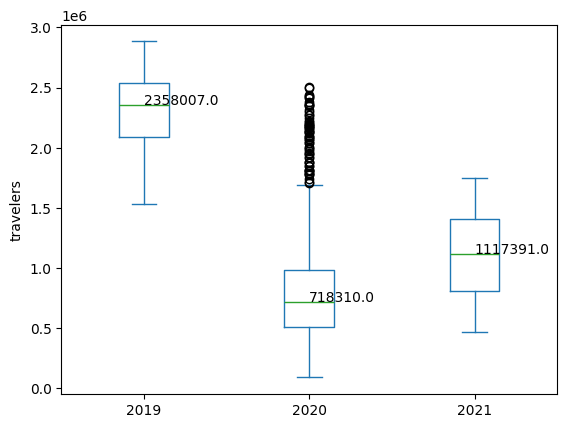

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/tsa_melted_holiday_travel.csv')
data = data.pivot(columns='year', values='travelers')

ax = data.plot(kind='box', ylabel='travelers')

'''
# Annotate medians
medians = data.median()
for i, median in enumerate(medians):
    ax.annotate(f'Median: {median:.2f}', xy=(i+1, median), xytext=(i+1, median+50000),
                arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
'''
i=1
for median in medians :
    ax.annotate(median, xy=(i,median),xytext=(i,median))
    i=i+1

plt.show()